# Chronic Kidney Disease Dataset Data Cleaning, Data Preparation and Data Visualization

### Import the required library and get the current working directory

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
import os

path = os.getcwd()

### Load all the datasets related to CKD challenge test

In [77]:
creatinine = pd.read_csv("T_creatinine.csv")
DBP = pd.read_csv("T_DBP.csv")
demo = pd.read_csv("T_demo.csv")
glucose = pd.read_csv("T_glucose.csv")
HGB = pd.read_csv("T_HGB.csv")
ldl = pd.read_csv("T_ldl.csv")
meds = pd.read_csv("T_meds.csv")
SBP = pd.read_csv("T_SBP.csv")
stage = pd.read_csv("T_stage.csv")
                    
#creatinine = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_creatinine.csv")
#DBP = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_DBP.csv?token=AASHKHAXHHB5R33ESVMVRVS6JIH36")
#demo = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_demo.csv?token=AASHKHDAHL7BEH4LJS34ZOC6JIIOW")
#glucose = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_glucose.csv?token=AASHKHDXQJK2UJCFEADJQ4K6JIIQM")
#HGB = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_HGB.csv?token=AASHKHEIJBTIMFSHHEK7MX26JIISY")
#ldl = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_ldl.csv?token=AASHKHECNBM4L6SYVWIXABC6JIIUO")
#meds = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_meds.csv?token=AASHKHETBGIOX3J4YMZHADS6JIIWK")
#SBP = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_SBP.csv?token=AASHKHHHVAWPOJKDGLJA6OC6JIIY6")
#stage = pd.read_csv("https://raw.githubusercontent.com/mritu301/Chronic_Kidney_Disease_Dataset_Challenge_Test/master/dataScienceTask/T_stage.csv?token=AASHKHHHJ4UU4HDBU76F6Q26JII2K")

### All the lab test data, demo, meds and stage_progress data are looking clean as of now

## Now lets do the visualization one by one for each type of dataset

# Lets create a generic method for ploting, data preparation

In [78]:
# this is for plotting purpose
def plot_bar(xasix, yasix, xlabelMsg, ylabelMsg, title, label):
    plt.bar(xasix, yasix, label = ylabelMsg)
    plt.xlabel(xlabelMsg, fontsize=10)
    plt.ylabel(ylabelMsg, fontsize=10)
    plt.xticks(xasix, label, fontsize=10, rotation=30)
    plt.title(title)
    
    plt.legend()
    plt.show()
    
def plot_bar_seaborn(count_column, title, xlabelMsg, ylabelMsg, flag):
    if flag:
        sns.set(rc={'figure.figsize':(25,10)})
    
    plot = sns.countplot(count_column)
    plot.set_title(title)
    plot.set_ylabel(ylabelMsg)
    plot.set_xlabel(xlabelMsg)
    

def prep_lab_test_df(df, lab_test):
    new_df = df.groupby('id', as_index=False).agg(
        no_of_test = ("value", "count"), 
        mean_value = ("value", "mean"), 
        duration_of_test = ("time", sum))

    new_df.insert(loc=0, column='id', value=new_df.index)
    print("Summary of " + lab_test + " lab test below:")
    print(new_df.describe())
    print("\n \nShape of " + lab_test + " lab test below:")
    print(new_df.shape)
    print("\n \nFirst four records of " + lab_test + " lab test below:")
    print(new_df.head())
    return new_df

### 1. Stage Progress visualization

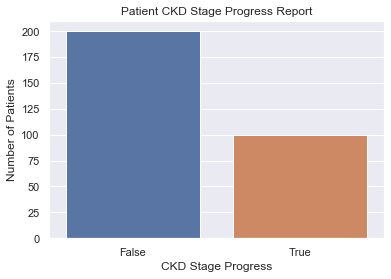

In [79]:
plot_bar_seaborn(stage.Stage_Progress, "Patient CKD Stage Progress Report", "CKD Stage Progress", "Number of Patients", False)

### Observations below for this CKD data:
1. 100 patients are make through the CKD stage progress out of 300 
2. 200 patients are not able to make through this CKD stage progress
3. This data is imm-balance dateset

Solution for impalance dataset:-
    1. over-sampling 
    2. under-sampling

### 2. Demography of CKD patients visualization

### 2.1 Gender Demography for CKD

         race  gender
count     300     300
unique      5       2
top     White  Female
freq      226     176





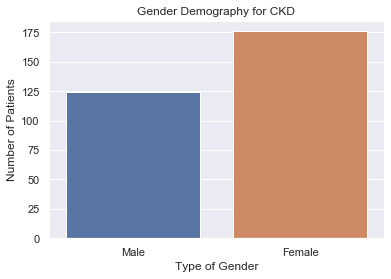

In [80]:
print(demo.describe(include=['object']))
print("\n\n")
plot_bar_seaborn(demo.gender, "Gender Demography for CKD", "Type of Gender", "Number of Patients", False)

### 2.2 Race Demography for CKD

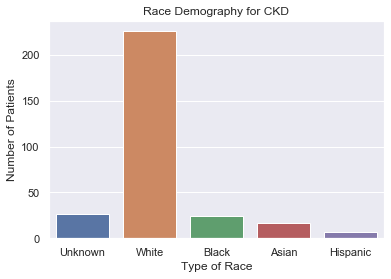

In [81]:
plot_bar_seaborn(demo.race, "Race Demography for CKD", "Type of Race", "Number of Patients", False)

### 2.3 Gender wise, Race Demography for CKD

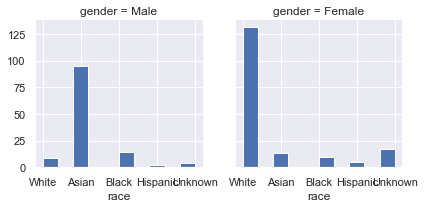

In [82]:
g = sns.FacetGrid(demo, col="gender")
g.map(plt.hist, "race");

### 2.4 Age distribution of CKD patients

(array([  8., 190., 102.]),
 array([ 25,  50,  75, 100]),
 <a list of 3 Patch objects>)

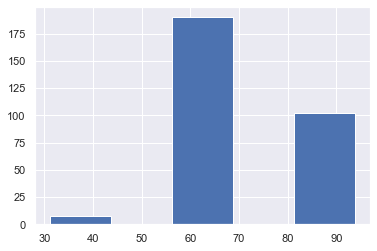

In [83]:
plt.hist(demo.age,rwidth=0.5,bins=[25, 50, 75, 100])

### Observations below for this CKD data for demography below:
1. We have total of 176 female observations and 124 of male
2. We have total of 5 race (White, Black, Asian, Hispanic and unknown)
3. Overall, White race is the highest in number and Hispanic is the least in number
4. In Female, White race is the highest one and in male, Asian race is the highest one
5. we have 8 patients, who are below 50 age
   in between 50 age and 75 age, we have 190 patients and 102 patients are of age more than 75.

### 3. Medicines of CKD patients visualization
##### Summary of meds dataset

In [84]:
meds.describe()

,id,daily_dosage,start_day,end_day
count,2181.000000,2181.000000,2181.000000,2181.000000
mean,144.054562,276.653141,291.254470,370.996332
std,87.194538,478.411077,191.087155,190.575803
min,0.000000,2.000000,-78.000000,-4.000000
25%,68.000000,20.000000,126.000000,208.000000
50%,140.000000,50.000000,290.000000,377.000000
75%,222.000000,320.000000,448.000000,534.000000
max,299.000000,2550.000000,691.000000,698.000000


In [85]:
meds.describe(include=['object'])

,drug
count,2181
unique,21
top,metformin
freq,482


#### We have total 21 different medicines which the doctor have been giving to the CKD patient
#### Out of those, metformin medicines has been prescribed to too many patients 
######  <i>(I think, it should be a significent parameter for CKD stage progress)</i>
<br><br><br>
### <bold> Below is the bar chart of medicines 

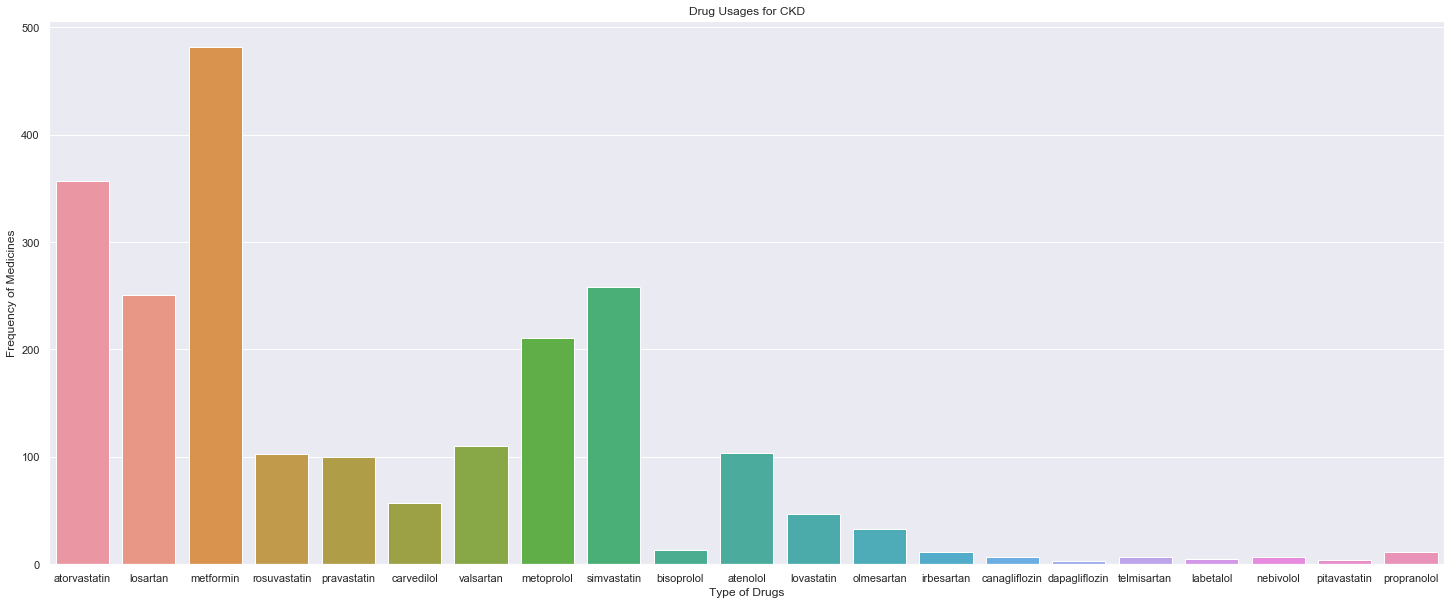

In [86]:
plot_bar_seaborn(meds.drug, "Drug Usages for CKD", "Type of Drugs", "Frequency of Medicines", True)

### Below is the days count for a particular medicine with their dosage

In [125]:
meds = pd.read_csv("T_meds.csv")

meds['no_of_days_with_drug'] = 0
meds['no_of_days_without_drug'] = 0

In [126]:
flag = True
temp = " "
for i in range(len(meds)):
    if meds.loc[i,'end_day'] < 0:
        meds.loc[i,'no_of_days_with_drug'] = 0
    else:
        meds.loc[i,'no_of_days_with_drug'] = meds.loc[i,'end_day'] - meds.loc[i,'start_day']
        
    if meds.loc[i,'drug'] != temp and flag:
        if meds.loc[i,'start_day'] < 0:
            meds.loc[i,'no_of_days_without_drug'] = 0
        else:
            meds.loc[i,'no_of_days_without_drug'] = meds.loc[i,'start_day']
        temp = meds.loc[i,'drug']
    elif meds.loc[i,'drug'] == temp:
        meds.loc[i,'no_of_days_without_drug'] = meds.loc[i,'start_day'] - meds.loc[i-1,'end_day']
        if meds.loc[i,'no_of_days_without_drug'] < 0:
            #meds.loc[i,'no_of_days_with_drug'] = meds.loc[i,'no_of_days_with_drug'] + meds.loc[i,'no_of_days_without_drug']
            meds.loc[i,'no_of_days_without_drug'] = 0
        
    if i+1 < len(meds) and meds.loc[i+1,'drug'] == temp:
        flag = False
    else:
        flag = True

In [127]:
meds.to_csv("meds.csv", index=False)

In [120]:
#meds.to_csv("meds.csv", index=False)
meds.head()

,id,drug,daily_dosage,start_day,end_day,no_of_days_with_drug,no_of_days_without_drug
0,0,atorvastatin,10.0,19,109,90,19
1,0,atorvastatin,10.0,117,207,90,8
2,0,losartan,100.0,19,289,270,19
3,0,losartan,100.0,403,493,90,114
4,0,losartan,100.0,587,677,90,94


In [123]:
new_df = meds.groupby(['id', 'drug'], as_index=False).agg(
        total_no_of_days_with_drug = ("no_of_days_with_drug", sum), 
        total_no_of_days_without_drug = ("no_of_days_without_drug", sum))

In [124]:
new_df.head()

,total_no_of_days_with_drug,total_no_of_days_without_drug
0,180,27
1,450,227
2,660,74
3,300,221
4,180,487


### 4. All Lab Blood Test of CKD patients summary

In [92]:
structured_creatinine = prep_lab_test_df(creatinine, "creatinine")
structured_glucose = prep_lab_test_df(glucose, "glucose")
structured_HGB = prep_lab_test_df(HGB, "Hemoglobin")
structured_ldl = prep_lab_test_df(ldl, "low-density lipoprotein")
structured_SBP = prep_lab_test_df(SBP, "systolic blood pressure")
structured_DBP = prep_lab_test_df(DBP, "Diastolic Blood Pressure")

Summary of creatinine lab test below:
               id  no_of_test  mean_value  duration_of_test
count  300.000000  300.000000  300.000000        300.000000
mean   149.500000    4.796667    1.319237       1409.396667
std     86.746758    1.288743    0.308531        557.715514
min      0.000000    2.000000    0.770000          6.000000
25%     74.750000    4.000000    1.108125       1081.500000
50%    149.500000    5.000000    1.271000       1322.000000
75%    224.250000    5.000000    1.504250       1767.250000
max    299.000000   10.000000    2.796000       3765.000000

 
Shape of creatinine lab test below:
(300, 4)

 
First four records of creatinine lab test below:
   id  no_of_test  mean_value  duration_of_test
0   0           6    1.236667              2043
1   1           5    1.838000              1214
2   2           5    2.170000              1737
3   3           5    0.996000              1800
4   4           6    1.150000              2120
Summary of glucose lab test below:

In [97]:
structured_creatinine.rename(columns={'no_of_test': "creatinine_no_of_test", 
                       'mean_value': "creatinine_mean_value", 
                       'duration_of_test': "creatinine_duration_of_test"}, inplace=True)
structured_glucose.rename(columns={'no_of_test': "glucose_no_of_test", 
                       'mean_value': "glucose_mean_value", 
                       'duration_of_test': "glucose_duration_of_test"}, inplace=True)
structured_HGB.rename(columns={'no_of_test': "HGB_no_of_test", 
                       'mean_value': "HGB_mean_value", 
                       'duration_of_test': "HGB_duration_of_test"}, inplace=True)
structured_ldl.rename(columns={'no_of_test': "ldl_no_of_test", 
                       'mean_value': "ldl_mean_value", 
                       'duration_of_test': "ldl_duration_of_test"}, inplace=True)
structured_SBP.rename(columns={'no_of_test': "SBP_no_of_test", 
                       'mean_value': "SBP_mean_value", 
                       'duration_of_test': "SBP_duration_of_test"}, inplace=True)
structured_DBP.rename(columns={'no_of_test': "DBP_no_of_test", 
                       'mean_value': "DBP_mean_value", 
                       'duration_of_test': "DBP_duration_of_test"}, inplace=True)

In [98]:
structured_creatinine.head()

,id,creatinine_no_of_test,creatinine_mean_value,creatinine_duration_of_test
0,0,6,1.236667,2043
1,1,5,1.838000,1214
2,2,5,2.170000,1737
3,3,5,0.996000,1800
4,4,6,1.150000,2120


In [99]:
structured_glucose.head()

,id,glucose_no_of_test,glucose_mean_value,glucose_duration_of_test
0,0,6,6.456667,2043
1,1,5,9.240000,1602
2,2,3,6.466667,804
3,3,6,6.525000,2475
4,4,7,9.720000,1974


In [100]:
structured_HGB.head()

,id,HGB_no_of_test,HGB_mean_value,HGB_duration_of_test
0,0,9,13.262222,5405
1,1,7,13.662857,4777
2,2,8,15.700000,4500
3,3,10,13.198000,7395
4,4,5,12.658000,2990


In [101]:
structured_ldl.head()

,id,ldl_no_of_test,ldl_mean_value,ldl_duration_of_test
0,0,3,143.593333,489
1,1,5,82.424000,1602
2,2,3,75.283333,681
3,3,5,98.246000,1670
4,4,4,65.907500,1016


In [102]:
structured_SBP.head()

,id,SBP_no_of_test,SBP_mean_value,SBP_duration_of_test
0,0,8,139.610000,3169
1,1,7,150.232857,2454
2,2,4,140.210000,1242
3,3,7,139.588571,2963
4,4,7,160.667143,2445


In [103]:
structured_DBP.head()

,id,DBP_no_of_test,DBP_mean_value,DBP_duration_of_test
0,0,8,83.173750,3169
1,1,7,80.455714,2454
2,2,4,89.217500,1242
3,3,7,74.857143,2963
4,4,7,97.385714,2445


In [112]:
df1 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(structured_creatinine, structured_glucose, on = 'id'), structured_HGB, on = 'id'), structured_ldl, on = 'id'),  structured_SBP, on = 'id'), structured_DBP, on = 'id')
df2 = pd.merge(demo, df1, on = 'id')
final = pd.merge(df2, stage, on = 'id')

In [113]:
final.shape

(300, 23)

In [114]:
final.head()

,id,race,gender,age,creatinine_no_of_test,creatinine_mean_value,creatinine_duration_of_test,glucose_no_of_test,glucose_mean_value,glucose_duration_of_test,...,ldl_no_of_test,ldl_mean_value,ldl_duration_of_test,SBP_no_of_test,SBP_mean_value,SBP_duration_of_test,DBP_no_of_test,DBP_mean_value,DBP_duration_of_test,Stage_Progress
0,0,Unknown,Male,70,6,1.236667,2043,6,6.456667,2043,...,3,143.593333,489,8,139.610000,3169,8,83.173750,3169,True
1,1,White,Female,71,5,1.838000,1214,5,9.240000,1602,...,5,82.424000,1602,7,150.232857,2454,7,80.455714,2454,False
2,2,White,Female,57,5,2.170000,1737,3,6.466667,804,...,3,75.283333,681,4,140.210000,1242,4,89.217500,1242,True
3,3,White,Male,74,5,0.996000,1800,6,6.525000,2475,...,5,98.246000,1670,7,139.588571,2963,7,74.857143,2963,False
4,4,White,Female,50,6,1.150000,2120,7,9.720000,1974,...,4,65.907500,1016,7,160.667143,2445,7,97.385714,2445,True


In [117]:
final.to_csv("final_CKD_except_meds.csv", index = False)